### Importing variables

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as stm
from pandas_profiling import ProfileReport

C:\Users\N.VISHWANATH\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os
os.chdir(r'G:\Praxis\ML\material\csv files\term 1 assmt')

In [4]:
prize = pd.read_csv('wk3_kc_house_train_data.csv')
prize_test = pd.read_csv('wk3_kc_house_test_data.csv')
prize_validate = pd.read_csv('wk3_kc_house_valid_data.csv')

## Infer the below Statistic

In [4]:
prize.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.428336e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.797779e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [5]:
prize.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.006011,-0.002571,0.005821,-0.007559,-0.130303,0.007793,0.000834,0.023355,-0.015321,0.012491,-0.006447,-0.003660,0.027053,-0.024900,-0.012130,0.009167,0.034395,-0.001315,-0.137562
price,-0.006011,1.000000,0.300777,0.527512,0.705044,0.094146,0.262955,0.274953,0.399711,0.044754,0.665594,0.611450,0.322369,0.051737,0.120439,-0.055619,0.299191,0.023718,0.584829,0.077960
bedrooms,-0.002571,0.300777,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,0.462514,0.301829,0.155102,0.018625,-0.148339,-0.010547,0.117168,0.376457,0.018149
bathrooms,0.005821,0.527512,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.044756,-0.201454,0.018453,0.217697,0.566076,0.068722
sqft_living,-0.007559,0.705044,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,0.878989,0.435069,0.322723,0.043627,-0.203761,0.054830,0.240170,0.758081,0.163545
sqft_lot,-0.130303,0.094146,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,0.180913,-0.000601,0.054043,0.001219,-0.126091,-0.092245,0.224524,0.145285,0.719922
floors,0.007793,0.262955,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.044827,0.134683,0.289238,-0.013269
waterfront,0.000834,0.274953,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.064297,0.082214,-0.027010,0.101684,0.023656,-0.009410,-0.039227,0.097196,0.028499
view,0.023355,0.399711,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.170286,0.277021,-0.056361,0.109750,0.075834,0.005503,-0.074630,0.292435,0.079904
condition,-0.015321,0.044754,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.017622,-0.106514,-0.080423,0.002253


In [31]:
# Finding rows base on values
wf = prize.loc[prize['waterfront']==1,'price']
wf
# So this is an outlier as this house is of only 1 floors and with 1620sqft living

21      1350000.0
100      655000.0
132     3080000.0
207      705000.0
297     3070000.0
          ...    
8549    1680000.0
8559     380000.0
8677     615000.0
9399    2300000.0
9736    3570000.0
Name: price, Length: 82, dtype: float64

In [34]:
min(wf)

285000.0

In [20]:
prize.loc[prize['price']==6890000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4235,9208900037,20140919T000000,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.24,4540,42730


In [24]:
seattle = prize.loc[prize['zipcode']==98102,'price']

[]

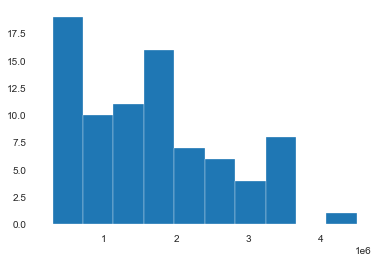

In [30]:
plt.hist(wf,bins=10)
plt.plot()

In [ ]:
prize.hist(column="zipcode",bins=40)
plt.show()

In [ ]:
prize_test.head()

In [64]:
y_train=prize['price']
y_train=np.log(prize['price'])
y_test=prize_test['price']
y_test=np.log(prize_test['price'])
y_validate=prize_validate['price']
y_validate=np.log(prize_validate['price'])

In [65]:
prize['log_sqft_living'] = np.log(prize['sqft_living'])
prize_test['log_sqft_living'] = np.log(prize_test['sqft_living'])
prize_validate['log_sqft_living'] = np.log(prize_validate['sqft_living'])

zipcode_dummy = pd.get_dummies(prize.zipcode)
zipcode_dummy_test = pd.get_dummies(prize_test.zipcode)
zipcode_dummy_validate = pd.get_dummies(prize_validate.zipcode)

aaa=prize_validate[['bedrooms','grade','log_sqft_living']]
aa=prize_test[['bedrooms','grade','log_sqft_living']]
a=prize[['bedrooms','grade','log_sqft_living']]

prize = pd.concat([a,zipcode_dummy],axis=1)
prize_test = pd.concat([aa,zipcode_dummy_test],axis=1)
prize_validate = pd.concat([aaa,zipcode_dummy_validate],axis=1)

x_train = prize
x_train=StandardScaler().fit_transform(x_train)
x_test = prize_test
x_test = StandardScaler().fit_transform(x_test)
x_validate = prize_validate
x_validate = StandardScaler().fit_transform(x_validate)